In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
OUTPUT_DATA_FILE = "weather_data/cities.csv"

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [ ]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [ ]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

In [ ]:
#Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [ ]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   



In [ ]:
len(city_data)

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [ ]:
#cols = city_data_df.columns.tolist()
#cols
# Reorder Columns
new_col_ord = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#Assign new dataframe with reordered columns
city_data_df = city_data_df[new_col_ord]
city_data_df

In [ ]:
# Export the City_Data into a CSV.
city_data_df.to_csv(OUTPUT_DATA_FILE, index_label="City_ID")
# Delete Dataframe
del(city_data_df)

In [4]:
# Read CSV file *******
city_data_df = pd.read_csv(OUTPUT_DATA_FILE)

In [5]:
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hermanus,ZA,2022-03-06 18:54:41,-34.4187,19.2345,69.80,94,23,2.35
1,1,Vaini,TO,2022-03-06 18:54:41,-21.2000,-175.2000,75.36,94,75,4.61
2,2,Pisco,PE,2022-03-06 18:54:39,-13.7000,-76.2167,75.02,83,20,9.22
3,3,Ilulissat,GL,2022-03-06 18:54:42,69.2167,-51.1000,14.29,93,100,8.30
4,4,Qaanaaq,GL,2022-03-06 18:54:42,77.4840,-69.3632,-0.78,67,0,6.98
...,...,...,...,...,...,...,...,...,...,...
546,546,Turayf,SA,2022-03-06 19:10:33,31.6725,38.6637,63.27,39,0,9.04
547,547,San Juan,AR,2022-03-06 19:09:39,-31.5375,-68.5364,87.78,26,0,4.52
548,548,Guhagar,IN,2022-03-06 19:10:34,17.4842,73.1929,79.16,60,95,5.17
549,549,Manokwari,ID,2022-03-06 19:10:34,-0.8667,134.0833,78.71,82,100,3.67


In [6]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

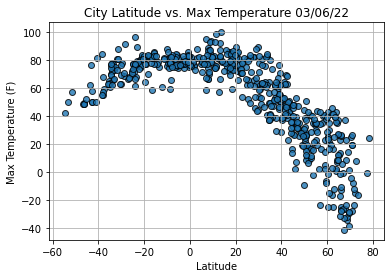

In [7]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

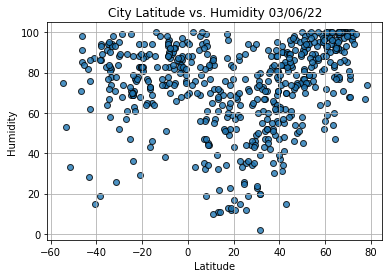

In [8]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

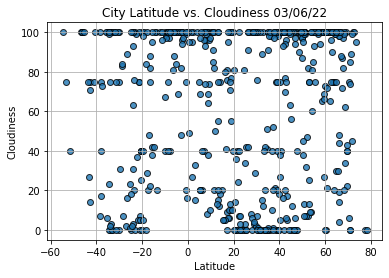

In [9]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

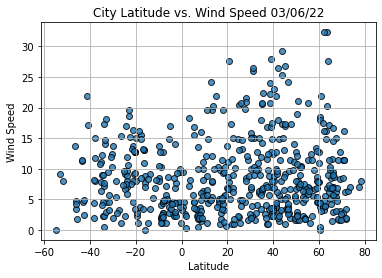

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [11]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                 Puerto Ayora
Country                        EC
Date          2022-03-06 18:54:45
Lat                       -0.7393
Lng                      -90.3518
Max Temp                    85.96
Humidity                       76
Cloudiness                     75
Wind Speed                   4.59
Name: 13, dtype: object

In [16]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,3,Ilulissat,GL,2022-03-06 18:54:42,69.2167,-51.1000,14.29,93,100,8.30
4,4,Qaanaaq,GL,2022-03-06 18:54:42,77.4840,-69.3632,-0.78,67,0,6.98
5,5,Hilo,US,2022-03-06 18:52:28,19.7297,-155.0900,75.25,77,100,6.91
7,7,Portland,US,2022-03-06 18:50:08,45.5234,-122.6762,48.20,83,100,3.44
8,8,Iqaluit,CA,2022-03-06 18:54:43,63.7506,-68.5145,1.13,78,75,6.91


In [13]:
#**Practice with Kourt
#northern_idx_s = city_data_df['Lat'] >0
#northern_idx_s

0      False
1      False
2      False
3       True
4       True
       ...  
546     True
547    False
548     True
549    False
550    False
Name: Lat, Length: 551, dtype: bool

In [14]:
#Practice with Kourt
#nh_city_data_df = city_data_df[northern_idx_s]
#nh_city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,3,Ilulissat,GL,2022-03-06 18:54:42,69.2167,-51.1000,14.29,93,100,8.30
4,4,Qaanaaq,GL,2022-03-06 18:54:42,77.4840,-69.3632,-0.78,67,0,6.98
5,5,Hilo,US,2022-03-06 18:52:28,19.7297,-155.0900,75.25,77,100,6.91
7,7,Portland,US,2022-03-06 18:50:08,45.5234,-122.6762,48.20,83,100,3.44
8,8,Iqaluit,CA,2022-03-06 18:54:43,63.7506,-68.5145,1.13,78,75,6.91
...,...,...,...,...,...,...,...,...,...,...
543,543,Voyvozh,RU,2022-03-06 19:09:32,62.8920,54.9635,-12.23,100,90,3.87
544,544,Kitimat,CA,2022-03-06 19:09:32,54.0524,-128.6534,37.78,85,60,1.74
545,545,Wamba,NG,2022-03-06 19:09:33,8.9333,8.6000,87.31,34,64,1.99
546,546,Turayf,SA,2022-03-06 19:10:33,31.6725,38.6637,63.27,39,0,9.04


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

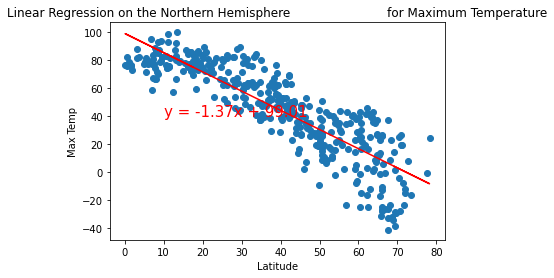

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

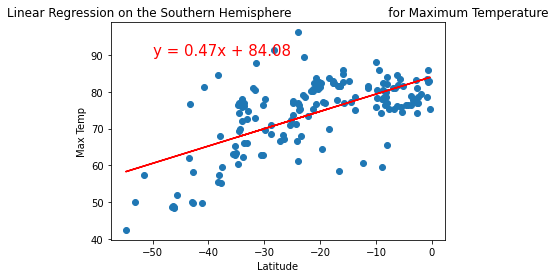

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

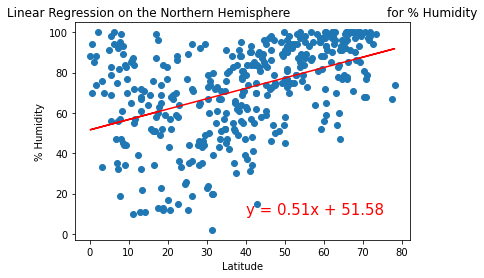

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

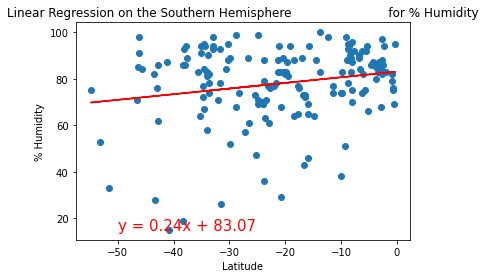

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

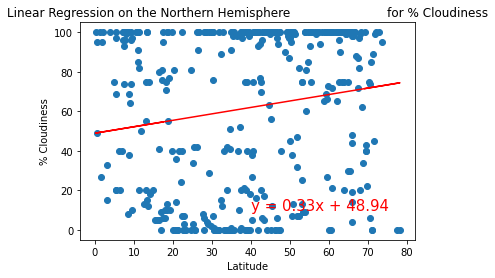

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

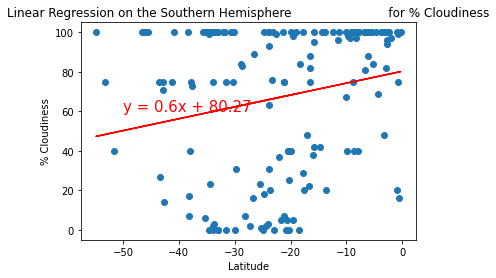

In [29]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

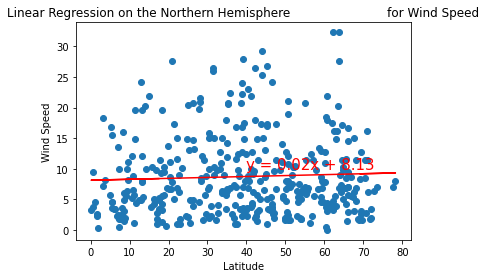

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

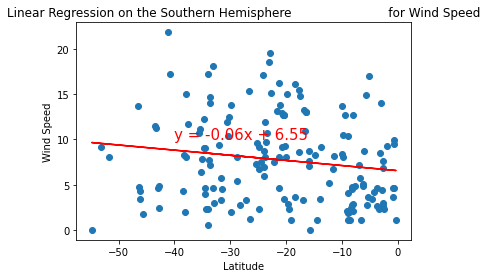

In [35]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-40,10))